<a href="https://colab.research.google.com/github/andrewmao33/mouse-analysis/blob/main/sleap_torso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
filename = "/content/drive/MyDrive/sleap/1min-test.analysis.h5"

In [ ]:
import h5py
import numpy as np

with h5py.File(filename, "r") as f:
    dset_names = list(f.keys())
    locations = f["tracks"][:].T
    node_names = [n.decode() for n in f["node_names"][:]]

print("===filename===")
print(filename)
print()

print("===HDF5 datasets===")
print(dset_names)
print()

print("===locations data shape===")
print(locations.shape)
print()

print("===nodes===")
for i, name in enumerate(node_names):
    print(f"{i}: {name}")
print()

===filename===
/content/drive/MyDrive/sleap/1min-test.analysis.h5

===HDF5 datasets===
['edge_inds', 'edge_names', 'instance_scores', 'labels_path', 'node_names', 'point_scores', 'provenance', 'track_names', 'track_occupancy', 'tracking_scores', 'tracks', 'video_ind', 'video_path']

===locations data shape===
(2160, 6, 2, 2)

===nodes===
0: nose
1: earL
2: earR
3: neck
4: torso
5: tailstart



In [ ]:
torso_locs = locations[:,4,:,:]
print(torso_locs[0,0])

[147.68270874 376.75387573]


In [ ]:
import matplotlib.pyplot as plt

# plot tracks of mice on 512x384 frame
def plot_tracks(locs):
  mouse1_x = locs[:, 0, 0]
  mouse1_y = locs[:, 1, 0]
  mouse2_x = locs[:, 0, 1]
  mouse2_y = locs[:, 1, 1]

  plt.figure(figsize=(10, 10))
  plt.plot(mouse1_x, 384 - mouse1_y, label='Mouse 1')
  plt.plot(mouse2_x, 384 - mouse2_y, label='Mouse 2')

  # set width and height

  plt.xlim(0, 512)
  plt.ylim(0, 384)

  # Add labels, legend, and grid
  plt.title('Mice Motion Trajectories')
  plt.xlabel('X Coordinate')
  plt.ylabel('Y Coordinate')
  plt.legend()
  plt.show()

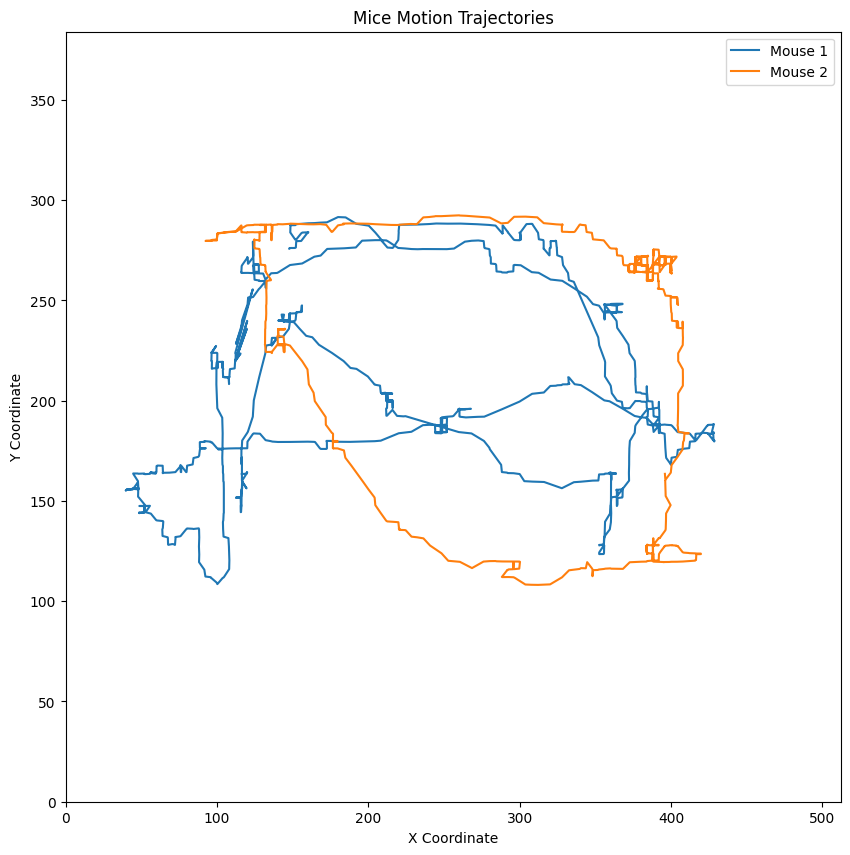

In [ ]:
plot_tracks(torso_locs)

In [ ]:
import cv2

# Replace with your video file path
video_path = "/content/drive/MyDrive/sleap/1min-test.mp4"
cap = cv2.VideoCapture(video_path)

# Example data (replace with your actual data)
# torso_locs: shape (frames, xy_coords, 2_instances)
# For example:
# torso_locs = np.random.rand(6120, 2, 2) * [512, 384]  # Dummy data for testing

# Check if the video opened successfully
if not cap.isOpened():
    print("Error: Cannot open video.")
    exit()

frame_idx = 0
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break  # Exit loop when video ends

    # Get the current frame's coordinates
    if frame_idx < len(torso_locs):
        mouse1_coords = torso_locs[frame_idx, :, 0]  # (x, y) for mouse 1
        mouse2_coords = torso_locs[frame_idx, :, 1]  # (x, y) for mouse 2

        # Draw circles on the mice's torso positions
        cv2.circle(frame, tuple(mouse1_coords.astype(int)), 5, (0, 0, 255), -1)  # Red for mouse 1
        cv2.circle(frame, tuple(mouse2_coords.astype(int)), 5, (255, 0, 0), -1)  # Blue for mouse 2

        # Optionally add labels
        cv2.putText(frame, "Mouse 1", tuple(mouse1_coords.astype(int) + [10, -10]),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)
        cv2.putText(frame, "Mouse 2", tuple(mouse2_coords.astype(int) + [10, -10]),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1)

    # Display the frame
    cv2_imshow(frame)

    # Break the loop on pressing 'q'
    if cv2.waitKey(30) & 0xFF == ord('q'):
        break

    frame_idx += 1

# Release the video and close windows
cap.release()
cv2.destroyAllWindows()


In [ ]:
from google.colab.patches import cv2_imshow

For example, here we download and display a PNG image of the Colab logo:

In [ ]:
# plot tracks of mice on 512x384 frame
def proximity(locs):
  mouse1_x = locs[:, 0, 0]
  mouse1_y = locs[:, 1, 0]
  mouse2_x = locs[:, 0, 1]
  mouse2_y = locs[:, 1, 1]

  distances = np.sqrt((mouse2_x - mouse1_x) ** 2 + (mouse2_y - mouse1_y) ** 2)

  # Plot the distance over time
  plt.figure(figsize=(10, 6))
  plt.plot(distances, label='Distance between Mice')
  plt.title('Distance Between Two Mice Over Time')
  plt.xlabel('Frame')
  plt.ylabel('Distance')
  plt.legend()
  plt.grid(True)
  plt.show()

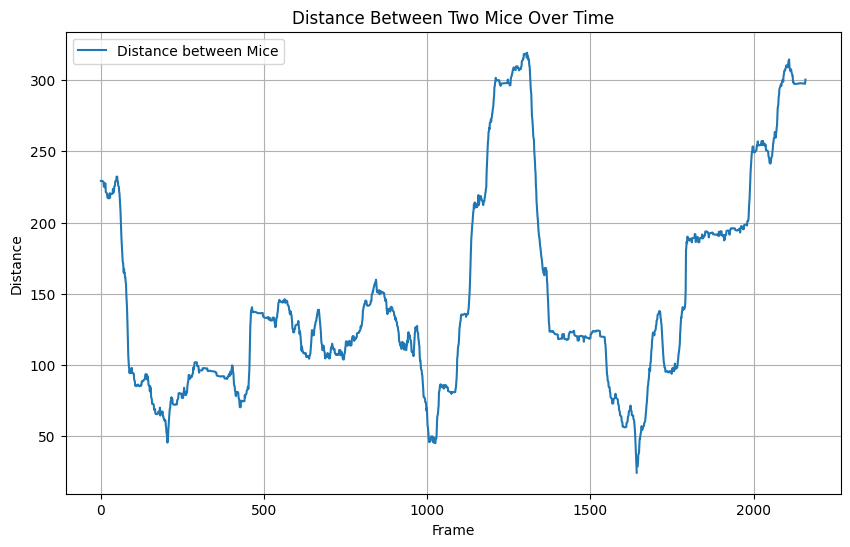

In [ ]:
proximity(torso_locs)

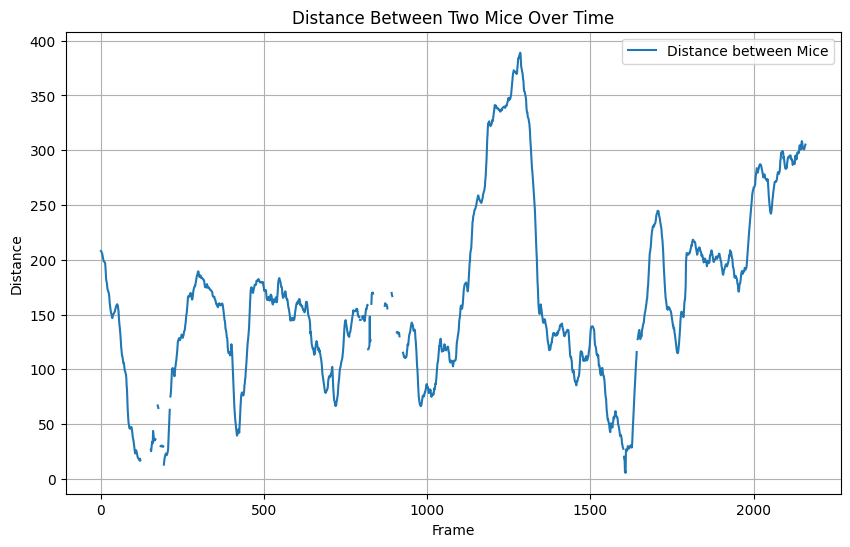

In [ ]:
proximity(locations[:,0,:,:]) # nose